<a href="https://colab.research.google.com/github/nathanschoeck/Machine-Learning/blob/main/Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is Python code to demonstrate the use of Random Forests for classification using the scikit-learn library.

1. Dataset:

- The Iris dataset is used for simplicity.
2. Data Splitting:

- The dataset is split into training and testing subsets.
3. Model Training:

- A RandomForestClassifier with 100 trees (n_estimators=100) is initialized and trained.
4. Evaluation:

- The model's performance is evaluated using accuracy, confusion matrix, and a classification report.
5. Feature Importance:

- Feature importances are plotted to show which features are most important for predictions.
6. Decision Boundaries:

- Decision boundaries are visualized using the first two features (optional, for 2D).

Accuracy: 0.8888888888888888
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



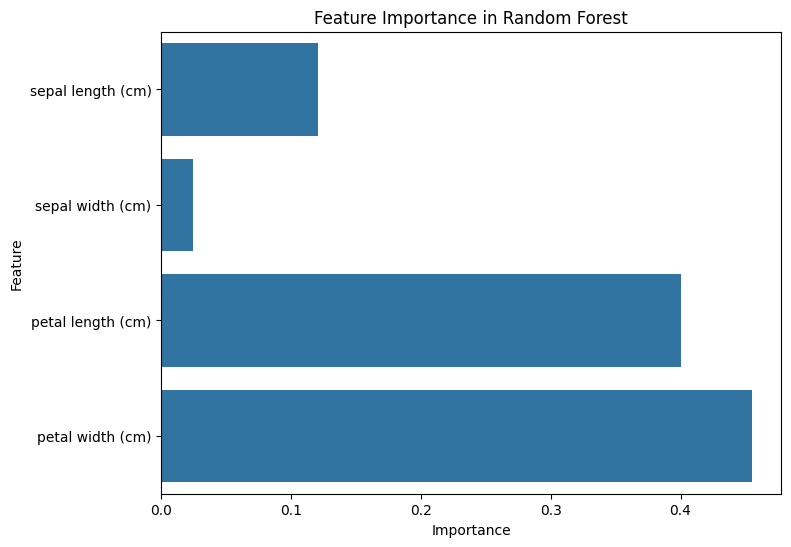

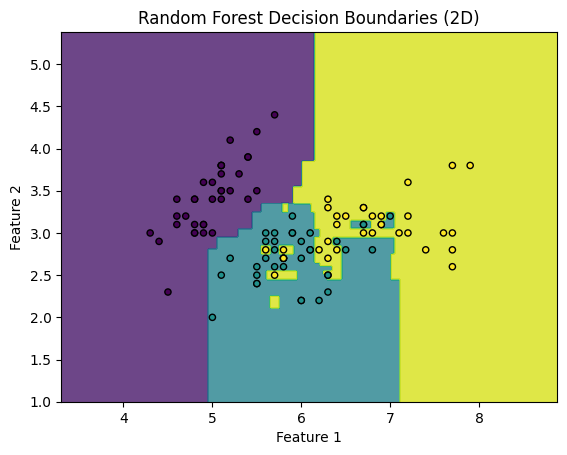

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Feature Importance
feature_importances = rf_clf.feature_importances_
features = data.feature_names

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Visualize Decision Boundaries (optional for 2D data)
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize with first two features (optional)
rf_clf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_2d.fit(X_train[:, :2], y_train)
plot_decision_boundaries(X_train[:, :2], y_train, rf_clf_2d, title="Random Forest Decision Boundaries (2D)")